In [107]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import RobustScaler

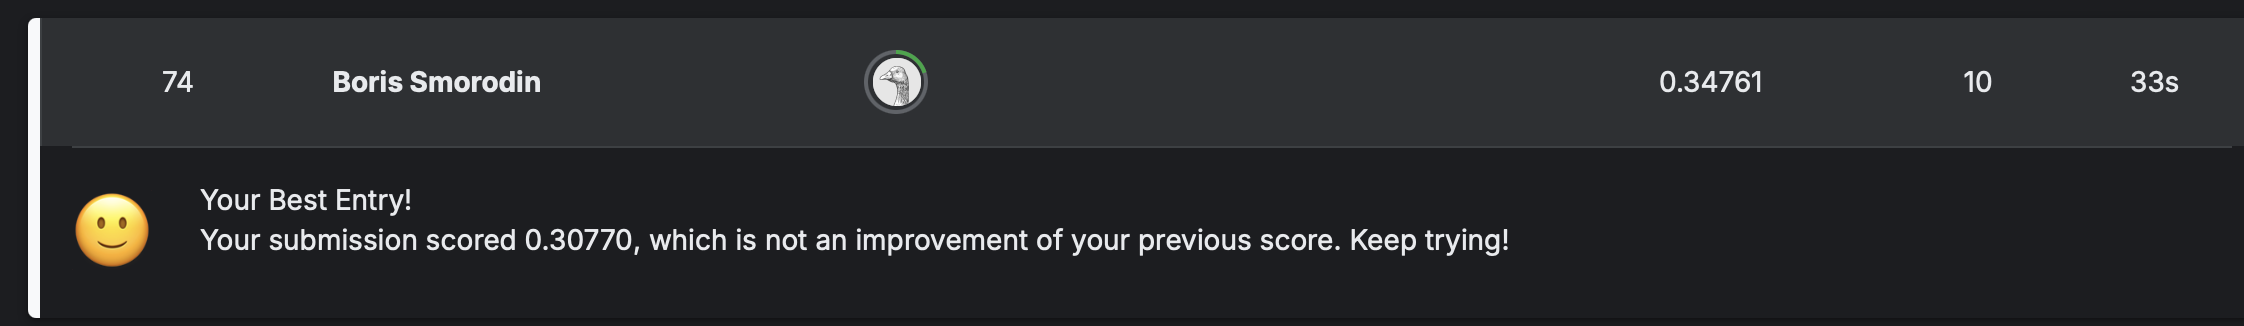

In [108]:
df = pd.read_csv('homework_5_data/Physical_Activity_Monitoring_unlabeled.csv')

## EDA

### Знакомство с данными

In [109]:
df.shape

(534601, 53)

In [110]:
df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

Видно, что в названиях признаков фигурируют места закрепления датчиков:
- hand
- chest
- ankle

А также измеряемая величина

In [112]:
df.describe()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,534601.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,...,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,534601.000000
mean,1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.218250,4.262513,-0.008852,0.028801,...,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
std,1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,...,0.618840,2.036102,19.303887,22.253170,17.907491,0.301254,0.559400,0.344271,0.466304,2.318076
min,37.660000,27.500000,-114.755000,-82.550900,-73.949700,-61.214700,-61.824200,-61.577100,-19.690500,-7.609010,...,-7.701040,-14.019600,-172.865000,-136.951000,-102.716000,0.000003,-0.954848,-0.876838,-0.997040,1.000000
25%,475.500000,31.312500,-9.076360,0.682775,1.588777,-8.981072,0.687587,1.780160,-0.153182,-0.083315,...,-0.049003,-0.221911,-39.689950,-10.960850,2.252230,0.145023,-0.676392,0.006839,-0.580040,2.000000
50%,827.610000,32.875000,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,...,-0.004481,0.000354,-26.285600,-0.014372,16.599500,0.240996,0.000000,0.322698,-0.281681,5.000000
75%,2876.990000,33.812500,0.383679,5.559742,6.864212,0.424770,5.592180,7.148178,0.130310,0.094342,...,0.048972,0.032649,-14.549500,19.245900,25.947100,0.501671,0.410052,0.594198,0.252247,7.000000
max,4007.730000,35.250000,60.912600,155.532000,78.480100,34.159400,62.259800,60.843700,22.960000,11.862600,...,6.002540,14.482700,41.764800,92.867000,122.521000,1.000000,0.959538,0.920506,0.996105,8.000000


In [113]:
df.subject_id.unique()

array([5, 2, 8, 6, 1, 4, 7, 3])

1. Все признаки числовые, что логично для показаний с датчиков.
2. В признаках присутствуют пустые значения, однако их количество мало.
3. Также присутствует идентификатор, указывающий на конкретный субъект измерения (человека). Всего представлено 8 уникальных значений
4. Показание каждого датчика, кроме температурного, характеризуется вектором измерений

### Предобработка данных

Необходимо заполнить пропущенные данные или удалить строки с проупсками.

Второй вариант не подходит, так как мы лишаемся ценной информации.

Поскольку измерений большое количество, заполнение пропусков усредненными значениями гипотетически даст лучшие результаты.

Однако заполнять пропуски усреднёнными значенями для признаков по всему датасету было бы неверно, поскольку, скорее всего, для разных субъектов будут наблюдаться различные нормальные показатели измерений.

Следовательно, стратегия такова:
- Сгруппируем признаки по субъектам и выделим средние значения по признакам для каждого субъекта.
- Заполним пустые значения признаков в группах вычисленными средними значениями

In [114]:
df.isna().any()

timestamp            False
handTemperature       True
handAcc16_1           True
handAcc16_2           True
handAcc16_3           True
handAcc6_1            True
handAcc6_2            True
handAcc6_3            True
handGyro1             True
handGyro2             True
handGyro3             True
handMagne1            True
handMagne2            True
handMagne3            True
handOrientation1      True
handOrientation2      True
handOrientation3      True
handOrientation4      True
chestTemperature      True
chestAcc16_1          True
chestAcc16_2          True
chestAcc16_3          True
chestAcc6_1           True
chestAcc6_2           True
chestAcc6_3           True
chestGyro1            True
chestGyro2            True
chestGyro3            True
chestMagne1           True
chestMagne2           True
chestMagne3           True
chestOrientation1     True
chestOrientation2     True
chestOrientation3     True
chestOrientation4     True
ankleTemperature      True
ankleAcc16_1          True
a

In [115]:
for i, col in enumerate(df.isna().any()):
    print(i, col)

0 False
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True
24 True
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 True
46 True
47 True
48 True
49 True
50 True
51 True
52 False


In [116]:
df["subject_id"].value_counts()

subject_id
5    76793
8    73047
6    70240
1    69882
2    68740
4    63740
7    62115
3    50044
Name: count, dtype: int64

Заполним средним значением

In [117]:
def fillna_series_mean(series: pd.Series,) -> pd.Series:
    result = series.fillna(series.mean())
    return result

In [118]:
df_na_to_mean = df.copy(deep=True)

In [119]:
def fillna_grouped_features(df: pd.DataFrame, mode: str):
    acceptable_modes = ["mean", "median"]
    if mode not in acceptable_modes:
        raise ValueError(f"mode must be in {acceptable_modes}")
    
    fillna_series = fillna_series_mean if mode == "mean" else fillna_series_median
    
    for i, value in enumerate(df.isna().any()):
        if value:
            df[df.columns[i]] = df.groupby("subject_id")[df.columns[i]].transform(fillna_series)
            
    return df 

In [120]:
df_na_to_mean = fillna_grouped_features(df_na_to_mean, "mean")
df_na_to_mean.isna().any()

timestamp            False
handTemperature      False
handAcc16_1          False
handAcc16_2          False
handAcc16_3          False
handAcc6_1           False
handAcc6_2           False
handAcc6_3           False
handGyro1            False
handGyro2            False
handGyro3            False
handMagne1           False
handMagne2           False
handMagne3           False
handOrientation1     False
handOrientation2     False
handOrientation3     False
handOrientation4     False
chestTemperature     False
chestAcc16_1         False
chestAcc16_2         False
chestAcc16_3         False
chestAcc6_1          False
chestAcc6_2          False
chestAcc6_3          False
chestGyro1           False
chestGyro2           False
chestGyro3           False
chestMagne1          False
chestMagne2          False
chestMagne3          False
chestOrientation1    False
chestOrientation2    False
chestOrientation3    False
chestOrientation4    False
ankleTemperature     False
ankleAcc16_1         False
a

In [121]:
for col in df.columns:
    print(col)

timestamp
handTemperature
handAcc16_1
handAcc16_2
handAcc16_3
handAcc6_1
handAcc6_2
handAcc6_3
handGyro1
handGyro2
handGyro3
handMagne1
handMagne2
handMagne3
handOrientation1
handOrientation2
handOrientation3
handOrientation4
chestTemperature
chestAcc16_1
chestAcc16_2
chestAcc16_3
chestAcc6_1
chestAcc6_2
chestAcc6_3
chestGyro1
chestGyro2
chestGyro3
chestMagne1
chestMagne2
chestMagne3
chestOrientation1
chestOrientation2
chestOrientation3
chestOrientation4
ankleTemperature
ankleAcc16_1
ankleAcc16_2
ankleAcc16_3
ankleAcc6_1
ankleAcc6_2
ankleAcc6_3
ankleGyro1
ankleGyro2
ankleGyro3
ankleMagne1
ankleMagne2
ankleMagne3
ankleOrientation1
ankleOrientation2
ankleOrientation3
ankleOrientation4
subject_id


In [122]:
df.isna().any()

timestamp            False
handTemperature       True
handAcc16_1           True
handAcc16_2           True
handAcc16_3           True
handAcc6_1            True
handAcc6_2            True
handAcc6_3            True
handGyro1             True
handGyro2             True
handGyro3             True
handMagne1            True
handMagne2            True
handMagne3            True
handOrientation1      True
handOrientation2      True
handOrientation3      True
handOrientation4      True
chestTemperature      True
chestAcc16_1          True
chestAcc16_2          True
chestAcc16_3          True
chestAcc6_1           True
chestAcc6_2           True
chestAcc6_3           True
chestGyro1            True
chestGyro2            True
chestGyro3            True
chestMagne1           True
chestMagne2           True
chestMagne3           True
chestOrientation1     True
chestOrientation2     True
chestOrientation3     True
chestOrientation4     True
ankleTemperature      True
ankleAcc16_1          True
a

Пропуски заполнены

## FE

На данном этапе преобразуем вектор измерений датчиков в длину вектора измерений. Это позволит нам избавиться от большого количества признаков, при этом сохранив ключевую информацию

In [123]:
def transform_features(df: pd.DataFrame) -> pd.DataFrame:
    
    def match_type(match_object: re.Match) -> tuple[str, str, int]:
        groups = list(match_object.groups())
        if groups[0] is None:
            match_type_int = 1
        if groups[-1] is None:
            match_type_int = 0
        while None in groups:
            groups.remove(None)
            
        groups.append(match_type_int)
        
        return tuple(groups)
    
    def calculate_length(dataframe: pd.DataFrame, cols: list[str]) -> np.array:
        squares = []
        for col in cols:
            square = dataframe[col] ** 2
            squares.append(square)
        
        np_squares = np.array(squares)
        print(np_squares)
        sum_array = np_squares[0]
        for i in range(1, len(np_squares)):
            sum_array = sum_array + np_squares[i]
        print(sum_array)
        np_squares = sum_array ** 0.5
        return np_squares
        

    regexp = r"([A-Za-z]+\d{1,2})_(\d)|([A-Za-z]+)(\d)"
    feature_names_dict = {}

    for col in df.columns:
        match_obj = re.match(regexp, col)
        if match_obj:
            match_result = match_type(match_obj)
            new_feature_name = match_result[0]
            if match_result[2] == 0:
                old_feature_name = new_feature_name + "_" + match_result[1]
            else:
                old_feature_name = new_feature_name + match_result[1]
                
            feature_names_dict.setdefault(new_feature_name, []).append(old_feature_name)
            
    for new_feature, old_features in feature_names_dict.items():
        df[new_feature] = calculate_length(df, old_features)
        df = df.drop(columns=old_features)
        
    return df
            

In [124]:
df[["subject_id"]]

,subject_id
0,5
1,2
2,8
3,2
4,6
...,...
534596,5
534597,5
534598,5
534599,6


In [125]:
df_na_to_mean = transform_features(df_na_to_mean)

[[  0.81513271  16.55944665   4.03021685 ...  40.545693    29.83278856
   85.11741533]
 [ 55.63250404  14.15023642  92.19456324 ...   5.38848012 108.91844496
    4.02427672]
 [ 36.3909356   68.55376328   0.59857146 ...   4.87367437  82.32477289
    6.90496495]]
[ 92.83857234  99.26344635  96.82335155 ...  50.80784749 221.07600641
  96.046657  ]
[[ 1.01223721 35.67075625  3.25261225 ... 40.48089725 69.7034633
  82.38212613]
 [55.43919306 10.38598865 91.956017   ...  5.43118364 33.23730043
   3.89170311]
 [39.73600332 47.73386646  1.15278874 ...  6.79962991 37.7390291
   8.05242778]]
[ 96.1874336   93.79061136  96.36141799 ...  52.7117108  140.67979284
  94.32625702]
[[4.81881523e-04 1.34685309e-02 4.05261187e-04 ... 4.25799098e-02
  1.25592981e+01 3.07490253e-06]
 [1.69252428e-05 1.41351937e-01 1.77992016e-03 ... 1.29179142e-01
  7.60270329e+00 2.95544234e-04]
 [5.64934128e-07 1.66157256e-04 1.32406446e-04 ... 3.85470396e+00
  7.72720112e-03 4.69497890e-06]]
[4.99371700e-04 1.54986625e-

In [126]:
df_na_to_mean.head()

,timestamp,handTemperature,chestTemperature,ankleTemperature,subject_id,handAcc16,handAcc6,handGyro,handMagne,handOrientation,chestAcc16,chestAcc6,chestGyro,chestMagne,chestOrientation,ankleAcc16,ankleAcc6,ankleGyro,ankleMagne,ankleOrientation
0,252.75,34.8750,36.6250,34.1250,5,9.635277,9.807519,0.022347,34.425872,1.0,9.476392,9.877675,0.039630,48.756258,1.0,10.130236,9.819462,0.059178,31.494810,1.0
1,3652.45,29.7500,34.6875,33.6250,2,9.963104,9.684555,0.393683,55.213200,1.0,12.175270,11.229790,0.475300,43.098251,1.0,6.958333,8.182519,1.934298,36.441815,1.0
2,504.76,34.3750,37.6250,33.9375,8,9.839886,9.816385,0.048141,29.232354,1.0,9.816755,9.797023,0.041782,26.697400,1.0,9.990753,9.828768,0.066698,35.493509,1.0
3,2801.61,31.9375,36.5000,34.5625,2,14.524775,14.864982,2.508222,49.067975,1.0,12.559313,13.233767,0.504263,39.066927,1.0,14.122803,18.410660,4.589847,48.480489,1.0
4,441.01,33.5000,35.8125,34.6875,6,9.717695,9.832993,0.034214,30.426190,1.0,9.779122,9.851332,0.063361,26.316878,1.0,9.957803,9.869706,0.031659,21.283705,1.0


In [127]:
df_na_to_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         534601 non-null  float64
 1   handTemperature   534601 non-null  float64
 2   chestTemperature  534601 non-null  float64
 3   ankleTemperature  534601 non-null  float64
 4   subject_id        534601 non-null  int64  
 5   handAcc16         534601 non-null  float64
 6   handAcc6          534601 non-null  float64
 7   handGyro          534601 non-null  float64
 8   handMagne         534601 non-null  float64
 9   handOrientation   534601 non-null  float64
 10  chestAcc16        534601 non-null  float64
 11  chestAcc6         534601 non-null  float64
 12  chestGyro         534601 non-null  float64
 13  chestMagne        534601 non-null  float64
 14  chestOrientation  534601 non-null  float64
 15  ankleAcc16        534601 non-null  float64
 16  ankleAcc6         53

В итоге получили 16 признаков без учёта subject_id. 

### Корреляционный анализ

In [128]:
corr_matrix_mean = df_na_to_mean.drop(columns=["subject_id"]).corr()

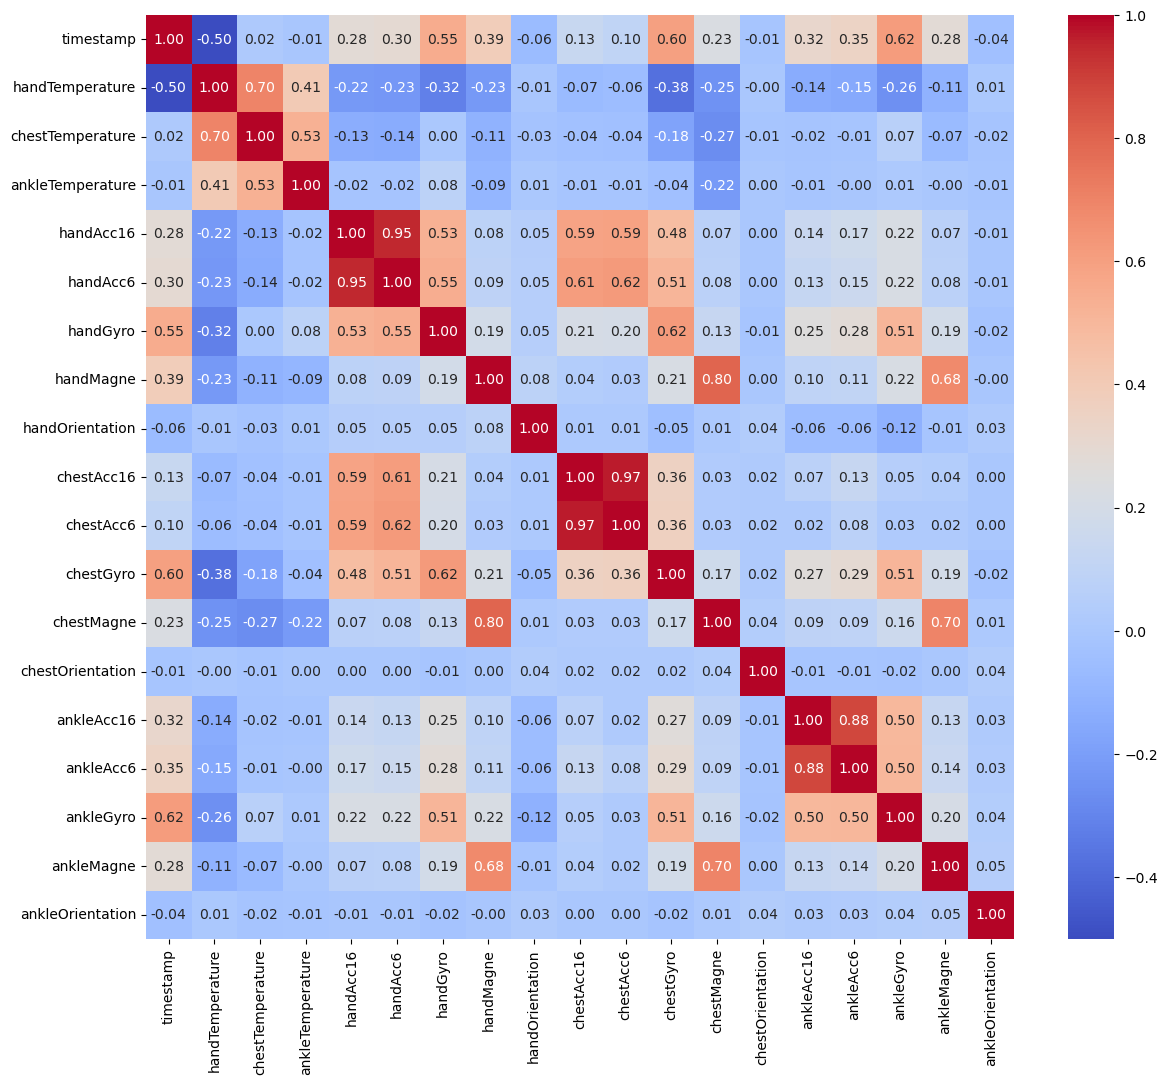

In [129]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    data=corr_matrix_mean,
    cmap='coolwarm',
    annot=True,
    fmt=".2f"
    )
plt.show()

In [130]:
def corr_matrix_analysis(corr_matrix: pd.DataFrame.corr) -> list[str]:

    high_corr_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            if abs(corr_matrix.iloc[i, j]) > 0.9:
                high_corr_pairs.append(pair)
            

    print("\nПары признаков с корреляцией > 0.9:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} и {pair[1]}: {pair[2]:.2f}")
        
    return high_corr_pairs

In [131]:
high_corr_pairs_mean = corr_matrix_analysis(corr_matrix_mean)


Пары признаков с корреляцией > 0.9:
handAcc16 и handAcc6: 0.95
chestAcc16 и chestAcc6: 0.97


Видно, что признаки практически линейно зависимые. Следвоательно, можно удалить один из признаков в каждой паре. Мне не нраивтся число 6, поэтому удалим признак Acc6

In [132]:
df_na_to_mean = df_na_to_mean.drop(columns=["handAcc6", "chestAcc6"])

In [133]:
df_na_to_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         534601 non-null  float64
 1   handTemperature   534601 non-null  float64
 2   chestTemperature  534601 non-null  float64
 3   ankleTemperature  534601 non-null  float64
 4   subject_id        534601 non-null  int64  
 5   handAcc16         534601 non-null  float64
 6   handGyro          534601 non-null  float64
 7   handMagne         534601 non-null  float64
 8   handOrientation   534601 non-null  float64
 9   chestAcc16        534601 non-null  float64
 10  chestGyro         534601 non-null  float64
 11  chestMagne        534601 non-null  float64
 12  chestOrientation  534601 non-null  float64
 13  ankleAcc16        534601 non-null  float64
 14  ankleAcc6         534601 non-null  float64
 15  ankleGyro         534601 non-null  float64
 16  ankleMagne        53

Итого осталось 14 признаков, не включая subject_id

In [134]:
df_na_to_mean

,timestamp,handTemperature,chestTemperature,ankleTemperature,subject_id,handAcc16,handGyro,handMagne,handOrientation,chestAcc16,chestGyro,chestMagne,chestOrientation,ankleAcc16,ankleAcc6,ankleGyro,ankleMagne,ankleOrientation
0,252.75,34.875000,36.6250,34.1250,5,9.635277,0.022347,34.425872,1.000000,9.476392,0.039630,48.756258,1.0,10.130236,9.819462,0.059178,31.494810,1.0
1,3652.45,29.750000,34.6875,33.6250,2,9.963104,0.393683,55.213200,1.000000,12.175270,0.475300,43.098251,1.0,6.958333,8.182519,1.934298,36.441815,1.0
2,504.76,34.375000,37.6250,33.9375,8,9.839886,0.048141,29.232354,1.000000,9.816755,0.041782,26.697400,1.0,9.990753,9.828768,0.066698,35.493509,1.0
3,2801.61,31.937500,36.5000,34.5625,2,14.524775,2.508222,49.067975,1.000000,12.559313,0.504263,39.066927,1.0,14.122803,18.410660,4.589847,48.480489,1.0
4,441.01,33.500000,35.8125,34.6875,6,9.717695,0.034214,30.426190,1.000000,9.779122,0.063361,26.316878,1.0,9.957803,9.869706,0.031659,21.283705,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,3479.53,33.875000,36.4375,34.1250,5,10.629118,4.439972,43.590911,1.000000,12.620551,2.130969,37.842988,1.0,22.912390,24.519167,1.180975,41.689909,1.0
534597,2448.49,34.603389,38.2500,34.1875,5,7.899791,0.043794,35.302914,0.597118,12.290140,0.790134,41.034572,1.0,18.156183,13.818043,3.880268,50.553846,1.0
534598,2479.84,34.687500,38.3125,34.3125,5,7.127962,2.006605,65.638750,1.000001,4.601540,0.533880,60.543222,1.0,9.800323,9.549536,0.844063,53.802212,1.0
534599,3437.82,28.062500,33.1875,33.8125,6,14.868625,4.491072,50.628692,1.000000,38.093478,1.742387,46.340162,1.0,5.637294,33.075838,6.556362,53.557214,1.0


Проверим, что соотношение между исходным 

In [135]:
crop = df_na_to_mean.groupby('subject_id').sample(frac=0.2, random_state=42).reset_index(drop=True)

crop['subject_id'].value_counts()

subject_id
5    15359
8    14609
6    14048
1    13976
2    13748
4    12748
7    12423
3    10009
Name: count, dtype: int64

In [136]:
crop = crop.drop(columns=["subject_id"])

## Обучение

### K-means

In [137]:
df_na_to_mean

,timestamp,handTemperature,chestTemperature,ankleTemperature,subject_id,handAcc16,handGyro,handMagne,handOrientation,chestAcc16,chestGyro,chestMagne,chestOrientation,ankleAcc16,ankleAcc6,ankleGyro,ankleMagne,ankleOrientation
0,252.75,34.875000,36.6250,34.1250,5,9.635277,0.022347,34.425872,1.000000,9.476392,0.039630,48.756258,1.0,10.130236,9.819462,0.059178,31.494810,1.0
1,3652.45,29.750000,34.6875,33.6250,2,9.963104,0.393683,55.213200,1.000000,12.175270,0.475300,43.098251,1.0,6.958333,8.182519,1.934298,36.441815,1.0
2,504.76,34.375000,37.6250,33.9375,8,9.839886,0.048141,29.232354,1.000000,9.816755,0.041782,26.697400,1.0,9.990753,9.828768,0.066698,35.493509,1.0
3,2801.61,31.937500,36.5000,34.5625,2,14.524775,2.508222,49.067975,1.000000,12.559313,0.504263,39.066927,1.0,14.122803,18.410660,4.589847,48.480489,1.0
4,441.01,33.500000,35.8125,34.6875,6,9.717695,0.034214,30.426190,1.000000,9.779122,0.063361,26.316878,1.0,9.957803,9.869706,0.031659,21.283705,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,3479.53,33.875000,36.4375,34.1250,5,10.629118,4.439972,43.590911,1.000000,12.620551,2.130969,37.842988,1.0,22.912390,24.519167,1.180975,41.689909,1.0
534597,2448.49,34.603389,38.2500,34.1875,5,7.899791,0.043794,35.302914,0.597118,12.290140,0.790134,41.034572,1.0,18.156183,13.818043,3.880268,50.553846,1.0
534598,2479.84,34.687500,38.3125,34.3125,5,7.127962,2.006605,65.638750,1.000001,4.601540,0.533880,60.543222,1.0,9.800323,9.549536,0.844063,53.802212,1.0
534599,3437.82,28.062500,33.1875,33.8125,6,14.868625,4.491072,50.628692,1.000000,38.093478,1.742387,46.340162,1.0,5.637294,33.075838,6.556362,53.557214,1.0


In [138]:
df_na_to_mean.describe()

,timestamp,handTemperature,chestTemperature,ankleTemperature,subject_id,handAcc16,handGyro,handMagne,handOrientation,chestAcc16,chestGyro,chestMagne,chestOrientation,ankleAcc16,ankleAcc6,ankleGyro,ankleMagne,ankleOrientation
count,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000
mean,1593.538159,32.451341,35.869593,33.493831,4.558615,11.137382,1.227208,48.002762,0.997414,10.091224,0.415722,42.648195,0.999637,12.230407,11.998622,1.275832,43.636276,0.997951
std,1243.906483,1.750354,1.503849,1.082701,2.318076,6.222250,1.810035,13.620251,0.031749,3.329911,0.593971,13.967384,0.010264,7.625412,6.590257,1.948516,18.089514,0.031166
min,37.660000,27.500000,32.062500,30.000000,1.000000,0.418703,0.000614,15.046280,0.578768,0.121532,0.000448,12.243470,0.684906,0.097642,0.080547,0.000589,4.723596,0.419079
25%,475.500000,31.312500,34.687500,32.750000,2.000000,9.601370,0.046523,37.258029,1.000000,9.485672,0.049123,31.625833,1.000000,9.869950,9.824338,0.039853,31.789574,1.000000
50%,827.610000,32.875000,35.937500,33.812500,5.000000,9.772925,0.356636,47.816058,1.000000,9.770836,0.196556,41.943068,1.000000,10.037030,9.876493,0.145186,42.962059,1.000000
75%,2876.990000,33.812500,37.187500,34.375000,7.000000,10.744657,1.774665,54.870362,1.000000,10.133013,0.552336,48.682047,1.000000,11.275745,11.166992,1.825694,50.115818,1.000000
max,4007.730000,35.250000,38.437500,35.000000,8.000000,198.746004,23.470033,207.448841,1.000001,63.412393,11.532051,125.807338,1.000001,225.797252,89.092226,15.399451,184.989082,1.000001


In [139]:
def n_clusters(crop: pd.DataFrame, postfix: str):
    X = crop

    wcss = []
    K_values = range(1, 15)

    for k in K_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    sns.lineplot(
        x = K_values,
        y = wcss,
        marker='o',
        linestyle='-',)
    plt.xlabel("Число кластеров (K)")
    plt.ylabel("WCSS")
    plt.title(f"Метод локтя для выбора K, {postfix}")
    plt.show()

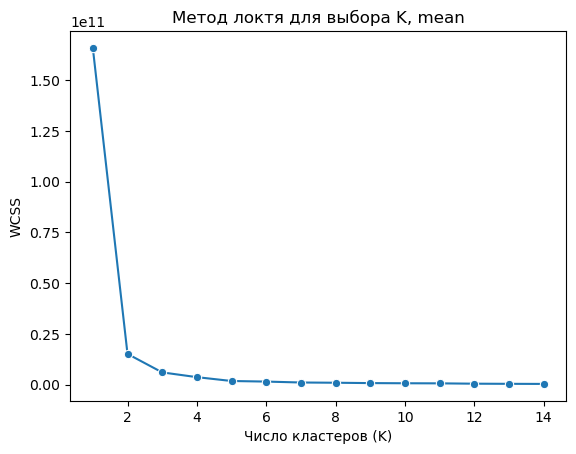

In [140]:
n_clusters(crop_mean, "mean")

K = 5

Попробуем 4-6 кластеров

In [141]:
def kmeans_learn(X: pd.DataFrame, clusters: list[int]):
    
    results = {}
    for i in clusters:
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        
        clusters_kmean = kmeans.predict(X)
        score = silhouette_score(X, clusters_kmean)
        results.setdefault(i, score)
        
        print(f'Score KMeans for K={i}: {score}')
        
    return results

In [142]:
results_k_means_mean = kmeans_learn(crop, [4, 5, 6])

Score KMeans for K=4: 0.6518000670452351
Score KMeans for K=5: 0.6544992034342253
Score KMeans for K=6: 0.6243108154776548


Лучший результат - на 5-ти кластерах

Результаты нормальные

In [143]:
def submit(df: pd.DataFrame, path: str) -> None:
    dict = {}
    activityID = 1

    for index, row in df.iterrows():
        if row['cluster'] in dict.keys():
            df.loc[index, 'activityID'] = dict[row['cluster']]
        else:
            dict[row['cluster']] = activityID
            df.loc[index, 'activityID'] = activityID
            activityID += 1

    submission = df[['activityID']].reset_index()
    submission.columns = ['Index', 'activityID']
    submission.to_csv(path, index=False)

In [144]:
X_mean = df_na_to_mean.drop(columns=["subject_id"])
model = KMeans(n_clusters=5, random_state=42)
clusters = model.fit_predict(X_mean)
result_df_mean = df_na_to_mean
result_df_mean["cluster"] = clusters
result_df_mean["activityID"] = -1

<Axes: ylabel='Count'>

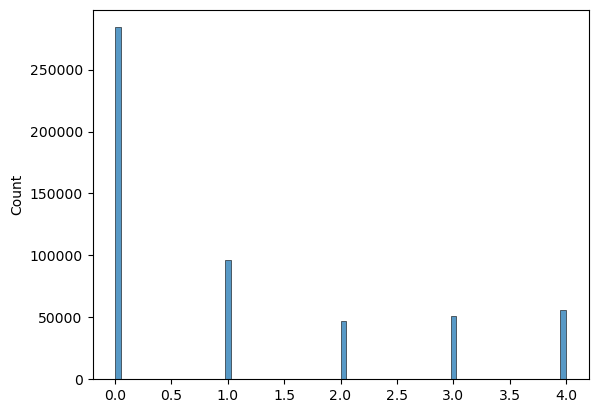

In [145]:
sns.histplot(clusters)

In [146]:
submit(result_df_mean, path="homework_5_data/submission_mean.csv")